In [105]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [64]:
df=pd.read_csv('/Users/aditya/PycharmProjects/clusteringkmeans/df_relevant.csv')
df.head()

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE
0,12346,1,4,4,144
1,12347,4,1,4,414
2,12348,2,3,4,234
3,12349,3,2,4,324
4,12350,1,3,2,132


In [83]:
df.shape

(4372, 5)

In [65]:
df_1 = df.assign(AddedScore=df['RSCORE'] + df['F SCORE'] + df['M SCORE'])
df_1.head()

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE,AddedScore
0,12346,1,4,4,144,9
1,12347,4,1,4,414,9
2,12348,2,3,4,234,9
3,12349,3,2,4,324,9
4,12350,1,3,2,132,6


In [66]:
df_1.describe()

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE,AddedScore
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,2.482617,2.489250,2.500000,275.654163,7.471866
std,1722.390705,1.105888,1.110514,1.118162,106.218759,1.347913
min,12346.000000,1.000000,1.000000,1.000000,112.000000,4.000000
25%,13812.750000,1.000000,1.000000,1.750000,144.000000,6.000000
50%,15300.500000,2.000000,2.000000,2.500000,244.000000,7.000000
75%,16778.250000,3.000000,3.000000,3.250000,341.000000,9.000000
max,18287.000000,4.000000,4.000000,4.000000,444.000000,12.000000


using logarithmic scale hence making it easier for us to identify outliers

In [67]:
# Apply logarithmic scale transformation to the score columns
df_1_log = df_1.copy()
df_1_log['RSCORE'] = np.log(df_1_log['RSCORE'])
df_1_log['F SCORE'] = np.log(df_1_log['F SCORE'])
df_1_log['M SCORE'] = np.log(df_1_log['M SCORE'])
df_1_log['AddedScore'] = np.log(df_1_log['AddedScore'])

# Display the transformed DataFrame
df_1_log

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE,AddedScore
0,12346,0.000000,1.386294,1.386294,144,2.197225
1,12347,1.386294,0.000000,1.386294,414,2.197225
2,12348,0.693147,1.098612,1.386294,234,2.197225
3,12349,1.098612,0.693147,1.386294,324,2.197225
4,12350,0.000000,1.098612,0.693147,132,1.791759
...,...,...,...,...,...,...
4367,18280,0.000000,1.386294,0.000000,141,1.791759
4368,18281,0.000000,1.386294,0.000000,141,1.791759
4369,18282,1.386294,1.386294,0.000000,441,2.197225
4370,18283,1.386294,0.000000,1.386294,414,2.197225


In [68]:
df_1_log.describe()

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE,AddedScore
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,0.788899,0.791074,0.794513,275.654163,1.994103
std,1722.390705,0.517462,0.518627,0.520686,106.218759,0.187404
min,12346.000000,0.000000,0.000000,0.000000,112.000000,1.386294
25%,13812.750000,0.000000,0.000000,0.519860,144.000000,1.791759
50%,15300.500000,0.693147,0.693147,0.895880,244.000000,1.945910
75%,16778.250000,1.098612,1.098612,1.170533,341.000000,2.197225
max,18287.000000,1.386294,1.386294,1.386294,444.000000,2.484907


We will use the z-score method to remove outliers from our dataimport matplotlib.pyplot as plt

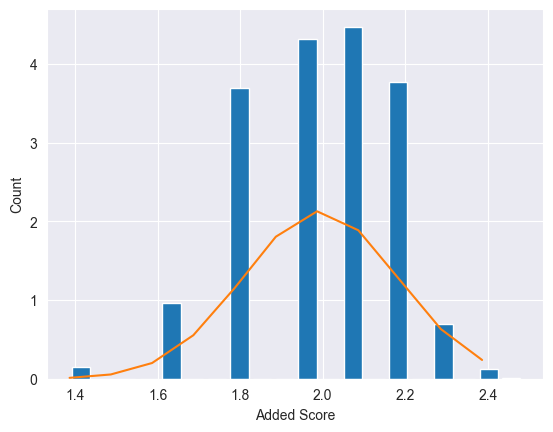

In [69]:
from scipy.stats import norm
import numpy as np
plt.hist(df_1_log.AddedScore, bins=20, rwidth=0.8, density=True)
plt.xlabel('Added Score')
plt.ylabel('Count')

rng = np.arange(df_1_log.AddedScore.min(), df_1_log.AddedScore.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df_1_log.AddedScore.mean(),df_1_log.AddedScore.std()))


In [70]:
df_1_log.AddedScore.mean()

1.9941033493920644

In [3]:
df_1_log.AddedScore.std()

NameError: name 'df_1_log' is not defined

Here the mean is 1.99 and standard deviation is 0.187.

Outlier detection and removal using Z Score

In [72]:
df_1_log['zscore'] = ( df_1_log.AddedScore - df_1_log.AddedScore.mean() ) / df_1_log.AddedScore.std()
df_1_log.head(5)

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE,AddedScore,zscore
0,12346,0.000000,1.386294,1.386294,144,2.197225,1.083868
1,12347,1.386294,0.000000,1.386294,414,2.197225,1.083868
2,12348,0.693147,1.098612,1.386294,234,2.197225,1.083868
3,12349,1.098612,0.693147,1.386294,324,2.197225,1.083868
4,12350,0.000000,1.098612,0.693147,132,1.791759,-1.079720


In [73]:
(2.197225-1.9941033493920644)/0.187

1.086212035336554

In [74]:
df_1_log[df_1_log['zscore']>2]

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE,AddedScore,zscore
169,12557,1.386294,1.098612,1.386294,434,2.397895,2.154659
262,12664,1.386294,1.098612,1.386294,434,2.397895,2.154659
365,12798,1.386294,1.386294,1.386294,444,2.484907,2.618958
425,12882,1.386294,1.386294,1.098612,443,2.397895,2.154659
443,12912,1.386294,1.098612,1.386294,434,2.397895,2.154659
473,12950,1.386294,1.098612,1.386294,434,2.397895,2.154659
614,13147,1.386294,1.386294,1.098612,443,2.397895,2.154659
669,13225,1.386294,1.098612,1.386294,434,2.397895,2.154659
999,13685,1.386294,1.098612,1.386294,434,2.397895,2.154659
1072,13784,1.386294,1.098612,1.386294,434,2.397895,2.154659


In [75]:
df_1_log[df_1_log['zscore']<-2]

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE,AddedScore,zscore
128,12506,0.000000,1.098612,0.000000,131,1.609438,-2.052599
182,12573,0.000000,1.098612,0.000000,131,1.609438,-2.052599
213,12607,0.693147,0.000000,0.000000,211,1.386294,-3.243308
267,12669,0.000000,0.000000,1.098612,113,1.609438,-2.052599
327,12743,0.693147,0.000000,0.693147,212,1.609438,-2.052599
...,...,...,...,...,...,...,...
4281,18168,0.000000,0.000000,1.098612,113,1.609438,-2.052599
4294,18183,0.000000,0.693147,0.693147,122,1.609438,-2.052599
4302,18193,0.000000,1.098612,0.000000,131,1.609438,-2.052599
4308,18203,0.000000,1.098612,0.000000,131,1.609438,-2.052599


In [77]:
df_1_log_cleaned = df_1_log[(df_1_log.zscore>-3) & (df_1_log.zscore<3)]
df_1_log_cleaned.head()

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE,AddedScore,zscore
0,12346,0.000000,1.386294,1.386294,144,2.197225,1.083868
1,12347,1.386294,0.000000,1.386294,414,2.197225,1.083868
2,12348,0.693147,1.098612,1.386294,234,2.197225,1.083868
3,12349,1.098612,0.693147,1.386294,324,2.197225,1.083868
4,12350,0.000000,1.098612,0.693147,132,1.791759,-1.079720


In [86]:
df2=df_1_log_cleaned
df2.shape

(4335, 7)

In [90]:
df2

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE,AddedScore,zscore
0,12346,0.000000,1.386294,1.386294,144,2.197225,1.083868
1,12347,1.386294,0.000000,1.386294,414,2.197225,1.083868
2,12348,0.693147,1.098612,1.386294,234,2.197225,1.083868
3,12349,1.098612,0.693147,1.386294,324,2.197225,1.083868
4,12350,0.000000,1.098612,0.693147,132,1.791759,-1.079720
...,...,...,...,...,...,...,...
4367,18280,0.000000,1.386294,0.000000,141,1.791759,-1.079720
4368,18281,0.000000,1.386294,0.000000,141,1.791759,-1.079720
4369,18282,1.386294,1.386294,0.000000,441,2.197225,1.083868
4370,18283,1.386294,0.000000,1.386294,414,2.197225,1.083868


In [87]:
rows_diff = df.shape[0] - df2.shape[0]
cols_diff = df.shape[1] - df2.shape[1]

print(f"Difference in rows: {rows_diff}")
print(f"Difference in columns: {cols_diff}")

Difference in rows: 37
Difference in columns: -2


Now we do data clustering with jitter using k means 

In [111]:
# Check that the needed columns are present in the DataFrame
assert {'RSCORE', 'F SCORE', 'M SCORE'}.issubset(df2.columns), "DataFrame must contain 'R', 'F', and 'M' columns"

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # You can choose the number of clusters
df2['Cluster'] = kmeans.fit_predict(df2[['RSCORE', 'F SCORE', 'M SCORE']])
#For more accurate results we can use elbow method to define the number of clusters

# Centroids of the clusters
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=['RSCORE', 'F SCORE', 'M SCORE'])

# Add jitter (small random noise) to the R, F, and M scores for visualization
def add_jitter(arr, scale=0.05):
    return arr + np.random.randn(len(arr)) * scale


df2['R_jitter'] = add_jitter(df2['RSCORE'])
df2['F_jitter'] = add_jitter(df2['F SCORE'])
df2['M_jitter'] = add_jitter(df2['M SCORE'])

# Add jitter to centroids for consistency in visualization
centroids_df['R_jitter'] = add_jitter(centroids_df['RSCORE'], scale=0.0)
centroids_df['F_jitter'] = add_jitter(centroids_df['F SCORE'], scale=0.0)
centroids_df['M_jitter'] = add_jitter(centroids_df['M SCORE'], scale=0.0)
centroids_df['Cluster'] = 'Centroid'  # Label the centroids

# Append centroids data to the original DataFrame
df_with_centroids = pd.concat([df2, centroids_df])

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(df_with_centroids, x='R_jitter', y='F_jitter', z='M_jitter', color='Cluster', symbol='Cluster')
fig.update_layout(title='3D Scatter Plot with K-means Clustering and Jitters (Including Centroids)')
fig.show()


/var/folders/kb/gcm8sg511nv0stb__mrkgz8m0000gn/T/ipykernel_9235/2094304027.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kb/gcm8sg511nv0stb__mrkgz8m0000gn/T/ipykernel_9235/2094304027.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kb/gcm8sg511nv0stb__mrkgz8m0000gn/T/ipykernel_9235/2094304027.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Silhouette Score: 0.4126111308394668


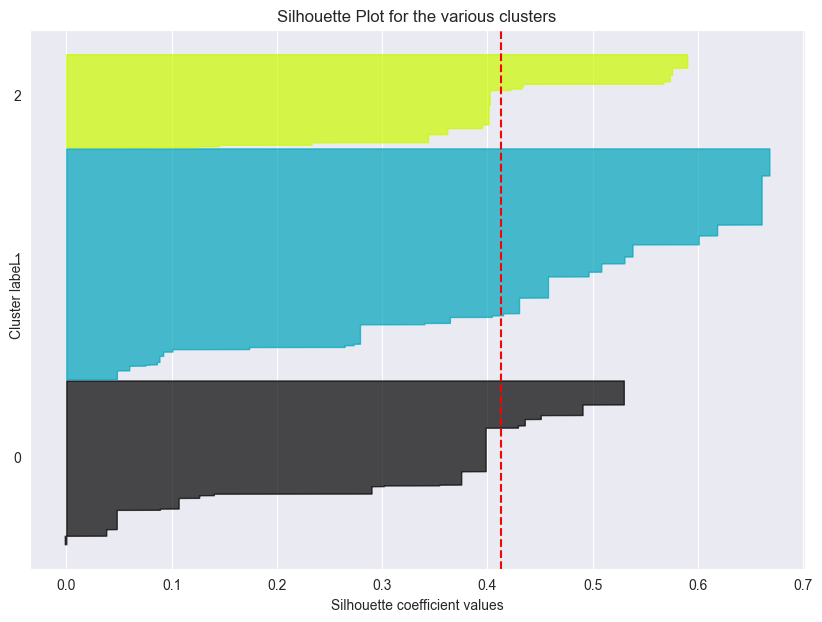

In [107]:
# Calculate silhouette score and plot silhouette graph
# Silhouette Score
X = df2[['RSCORE', 'F SCORE', 'M SCORE']]
cluster_labels = df2['Cluster']
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Silhouette Values
silhouette_values = silhouette_samples(X, cluster_labels)

# Plot Silhouette Graph
plt.figure(figsize=(10, 7))
y_lower = 10

for i in range(kmeans.n_clusters):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / kmeans.n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples gap between silhouette plots of individual clusters

plt.title("Silhouette Plot for the various clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.show()